<a href="https://colab.research.google.com/github/Khadegaali/desicion-tree/blob/main/decision_tree_for_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [205]:
df=pd.read_csv('/content/kc_house_data.csv')

In [206]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [208]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [209]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


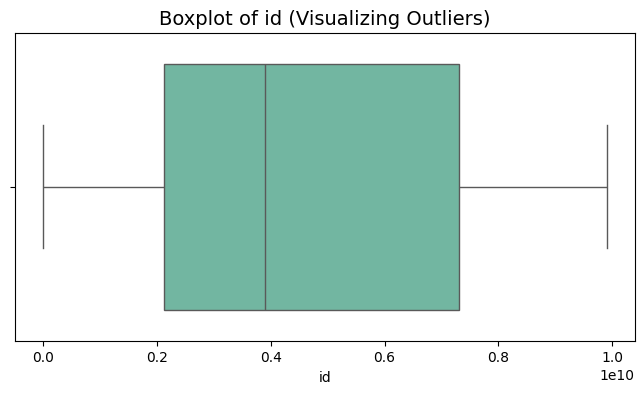

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


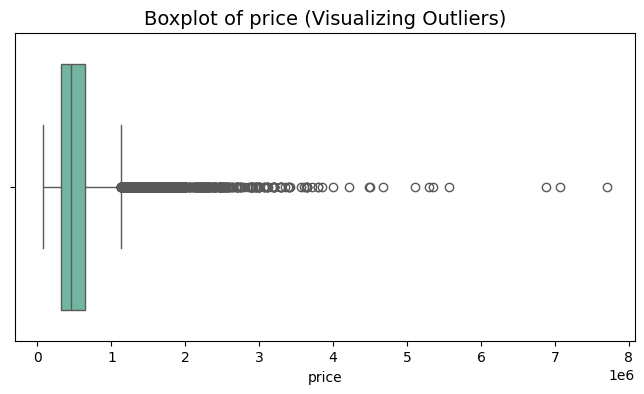

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


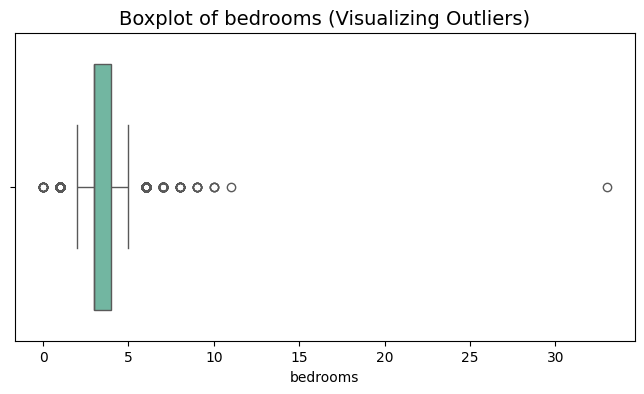

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


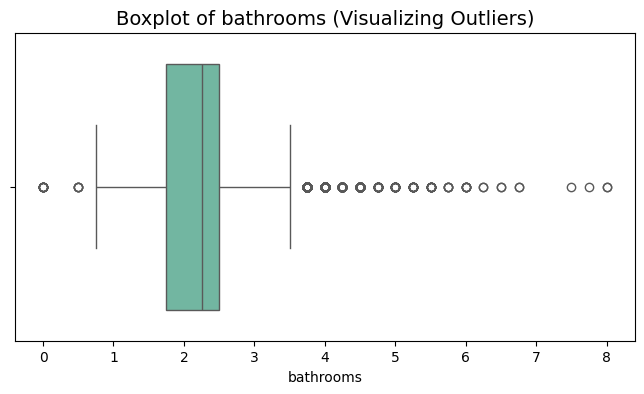

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


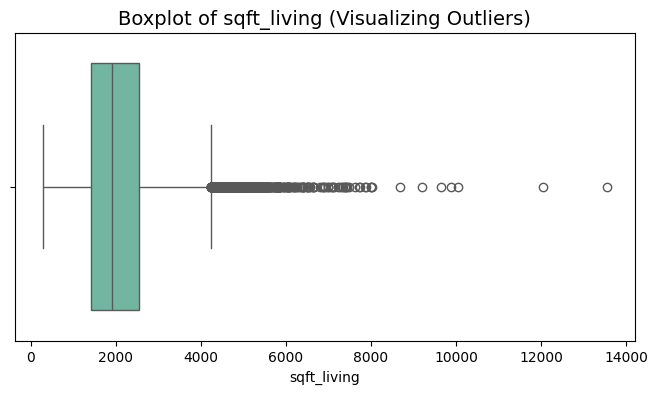

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


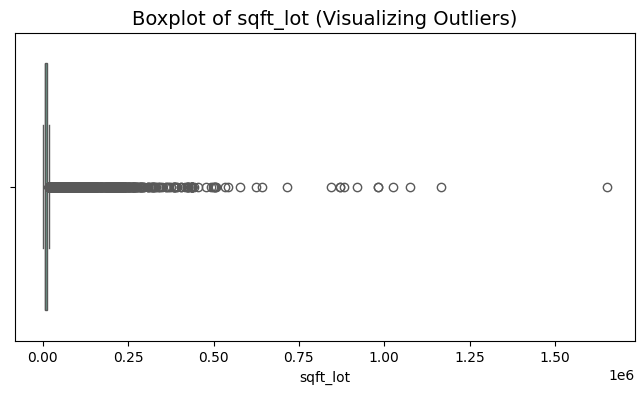

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


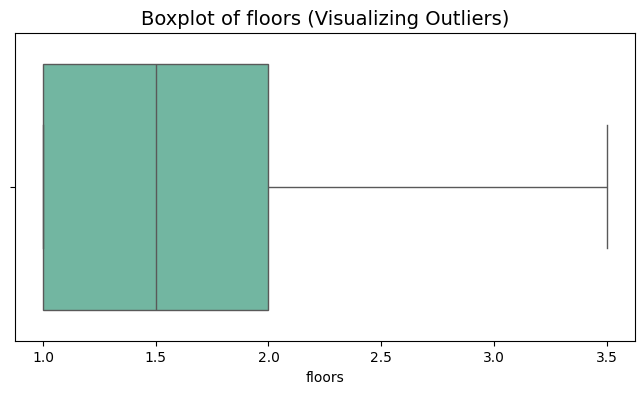

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


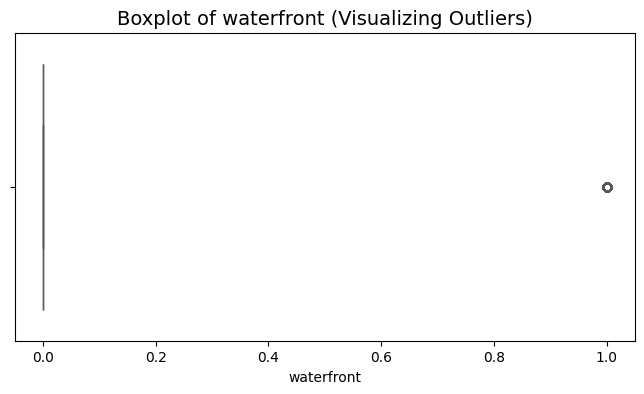

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


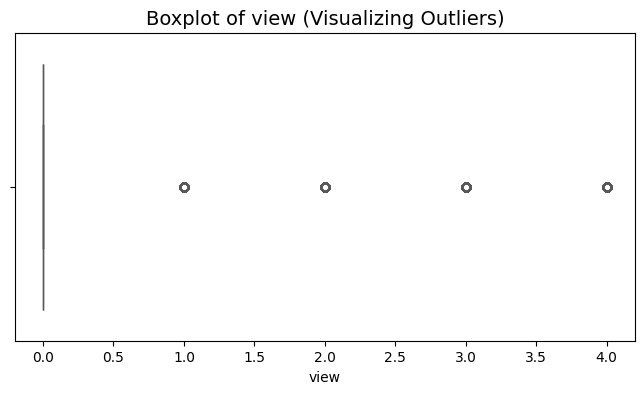

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


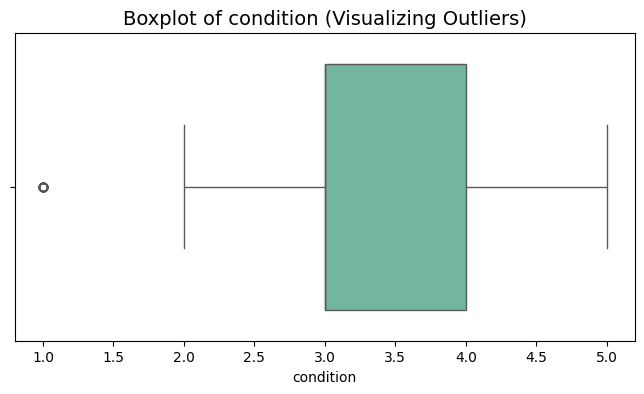

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


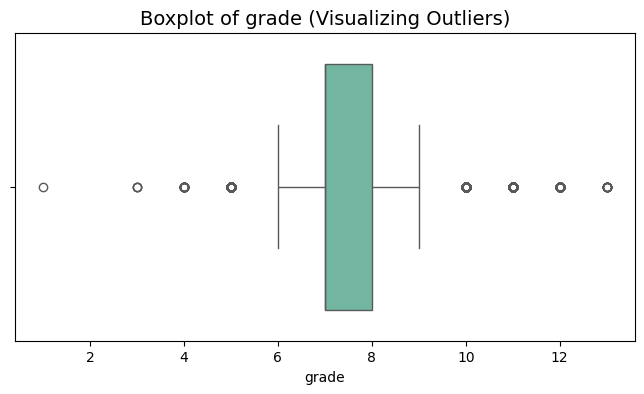

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


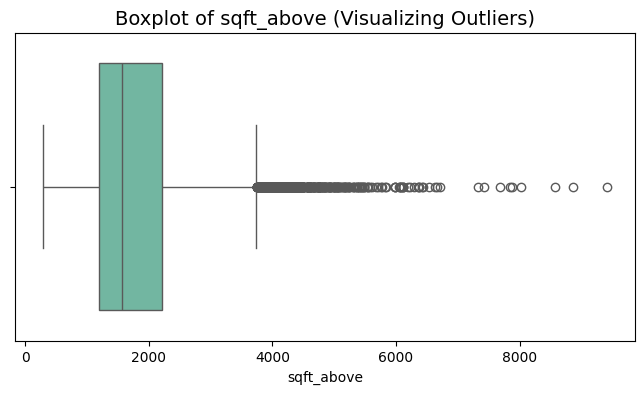

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


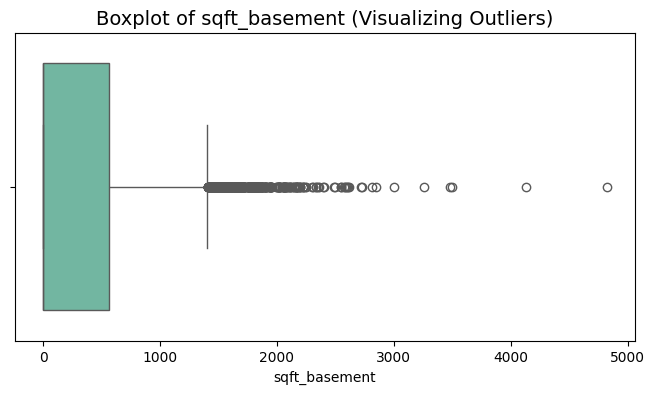

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


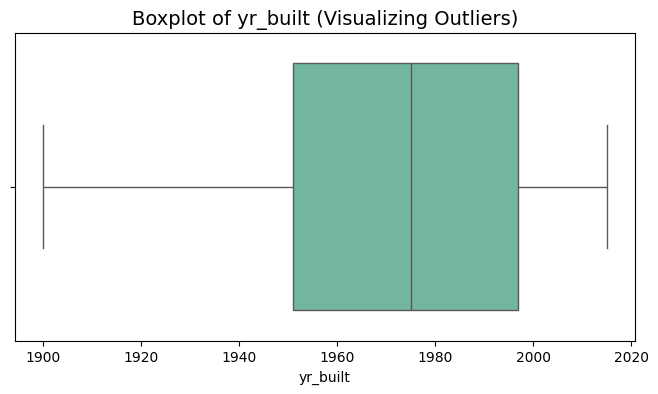

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


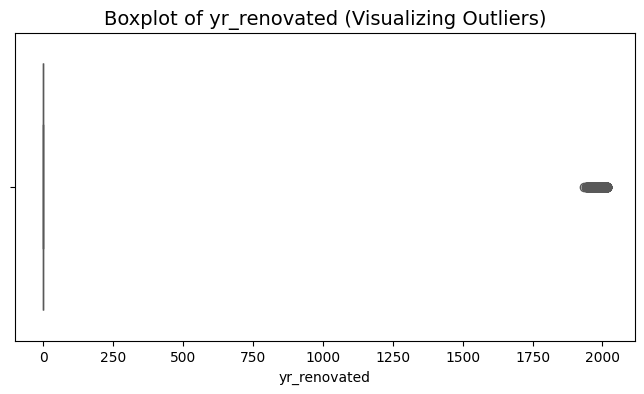

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


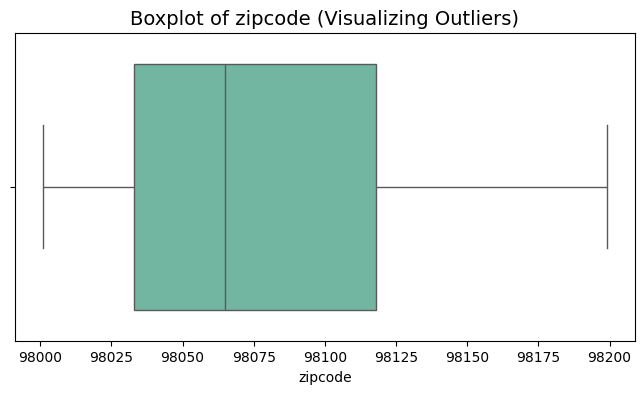

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


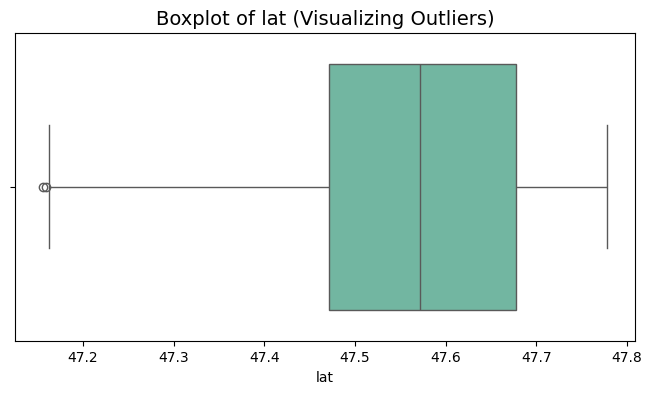

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


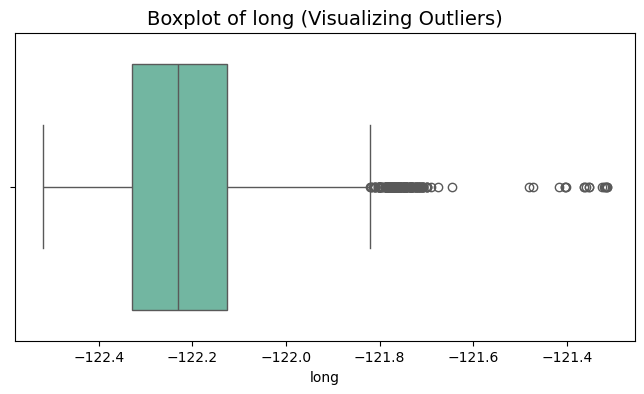

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


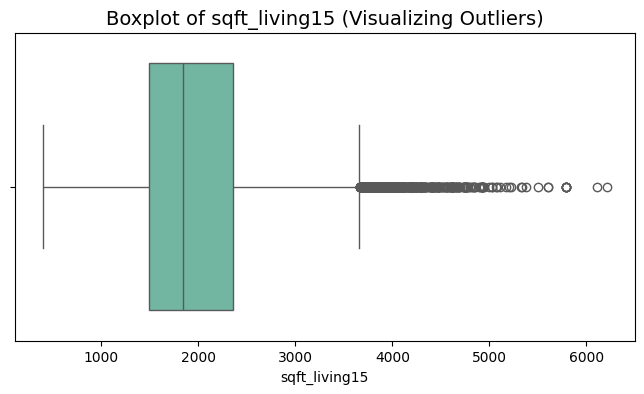

/tmp/ipython-input-1539638912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, palette="Set2")


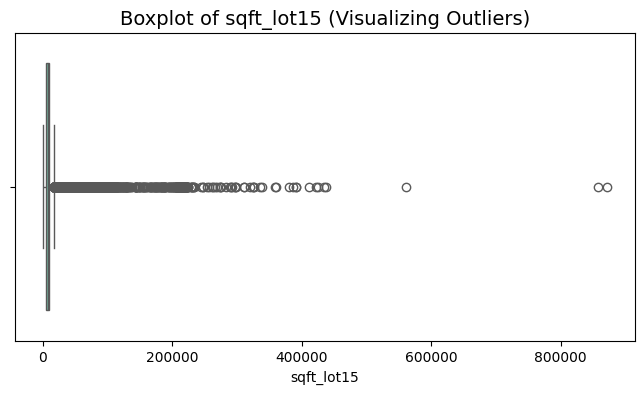

In [210]:
for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.title(f"Boxplot of {col} (Visualizing Outliers)", fontsize=14)
    plt.show()

In [211]:
# Create a copy to clean
df_cleaned = df.copy()

# Remove outliers only from numeric columns using IQR
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Final cleaned dataset
df = df_cleaned


/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


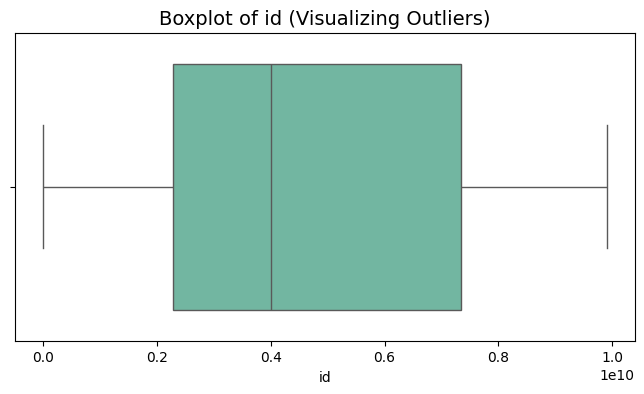

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


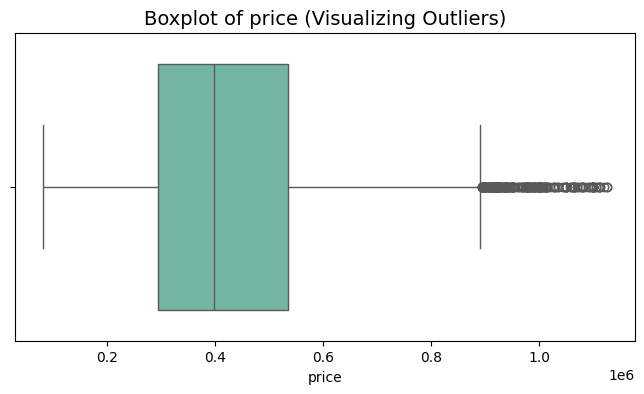

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


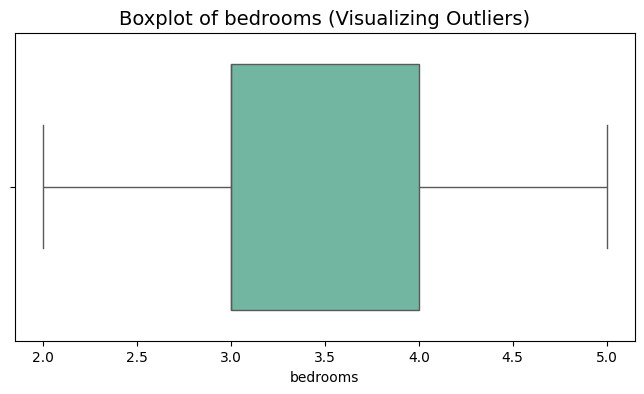

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


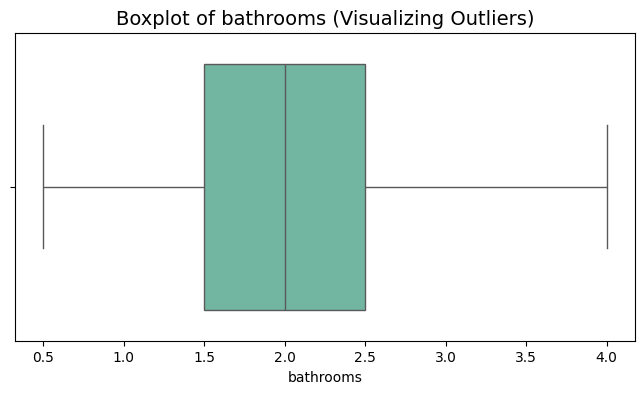

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


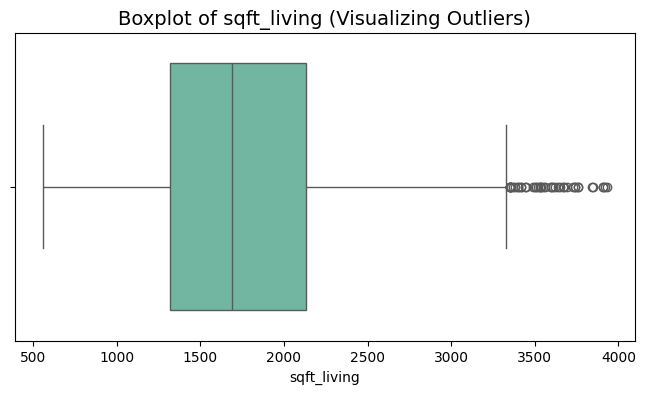

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


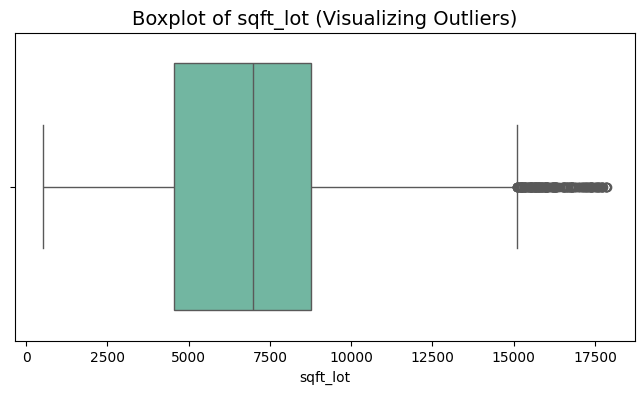

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


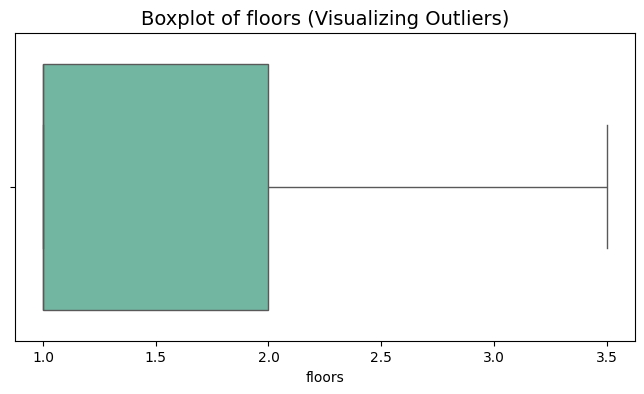

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


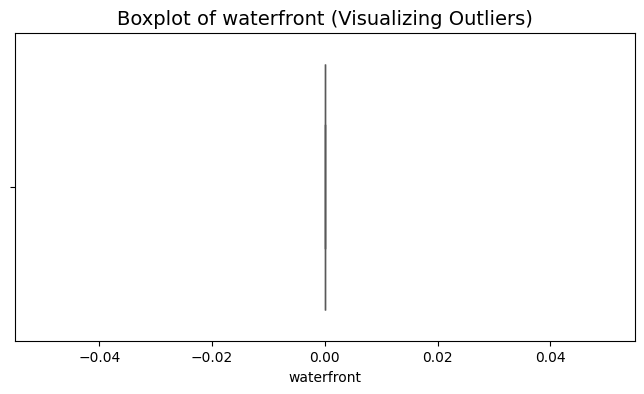

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


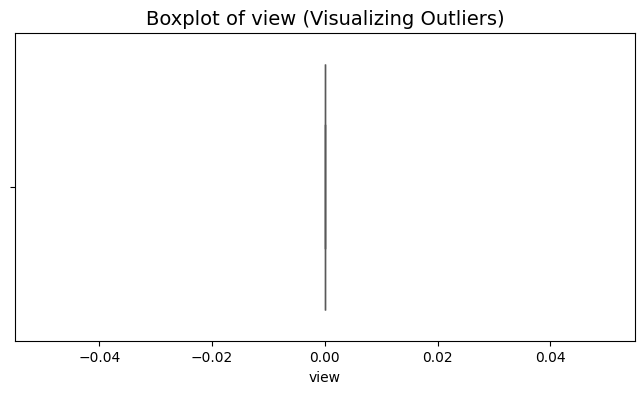

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


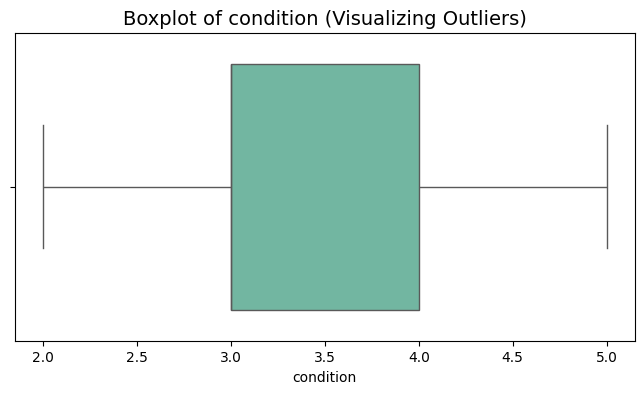

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


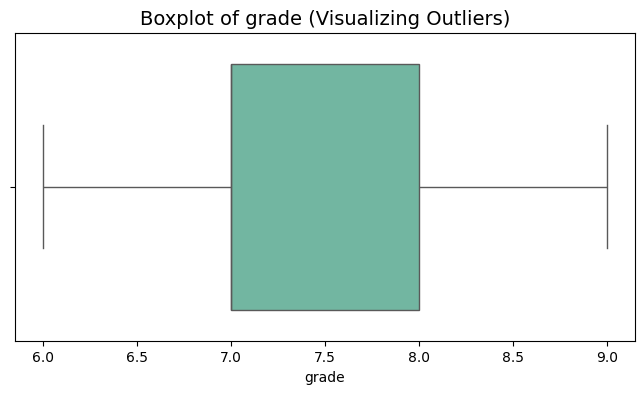

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


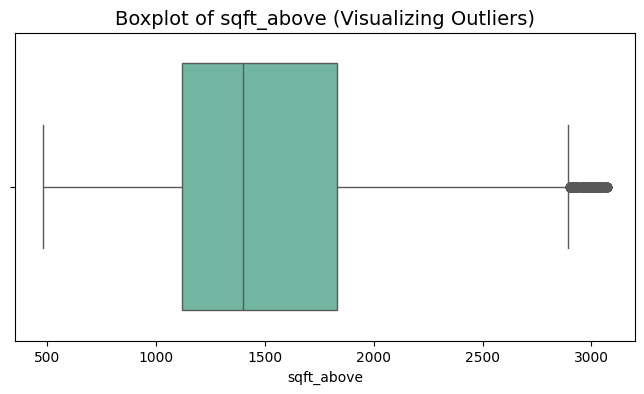

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


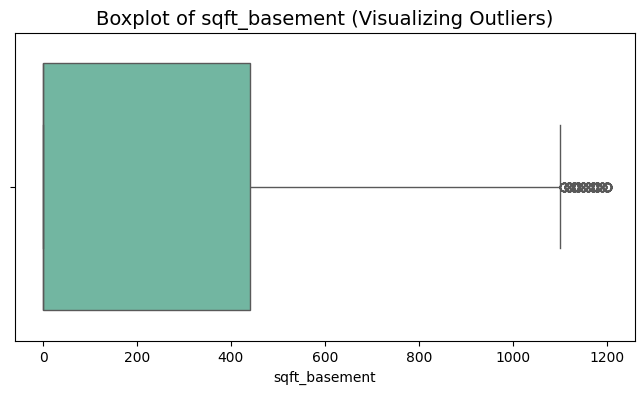

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


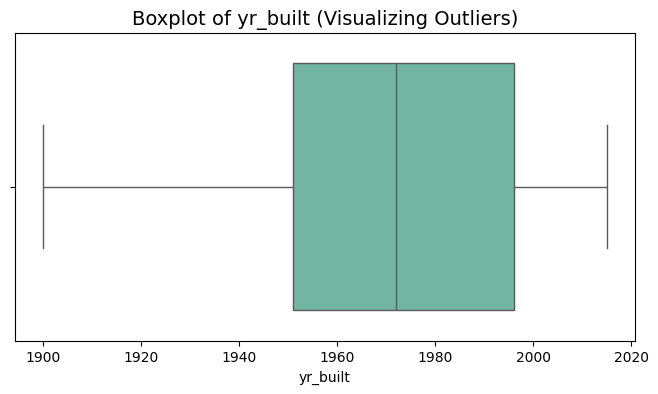

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


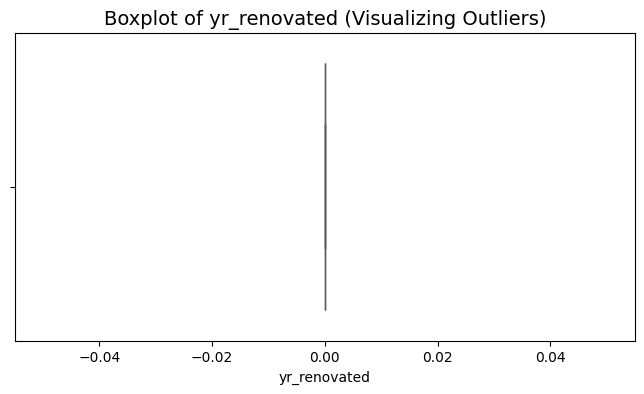

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


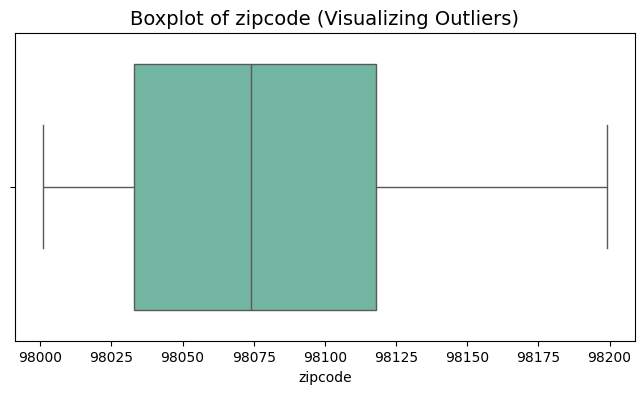

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


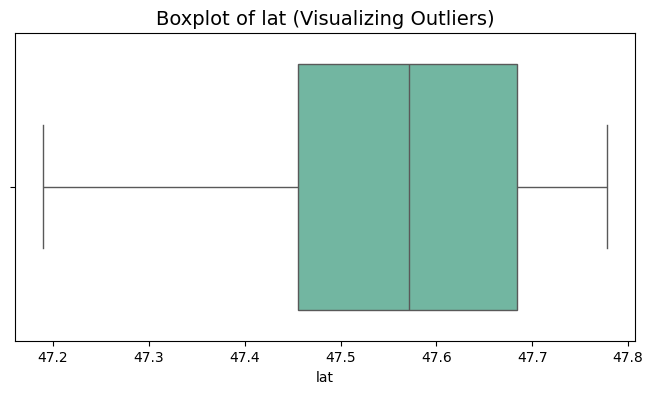

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


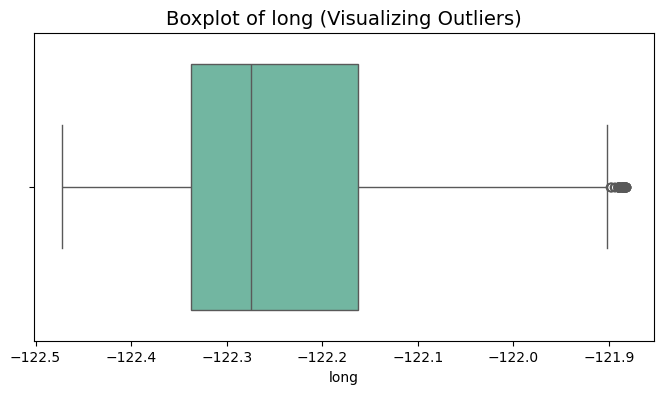

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


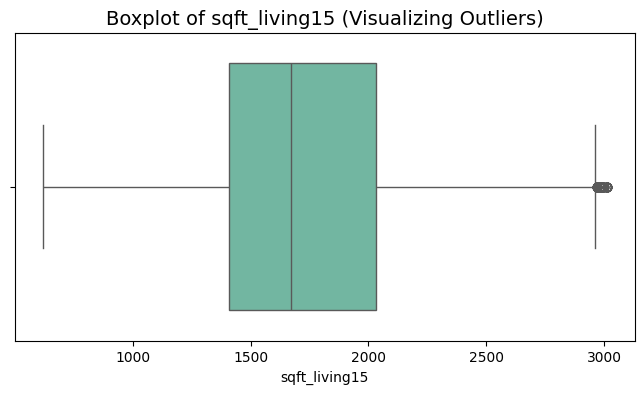

/tmp/ipython-input-1006004001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x=col, palette="Set2")


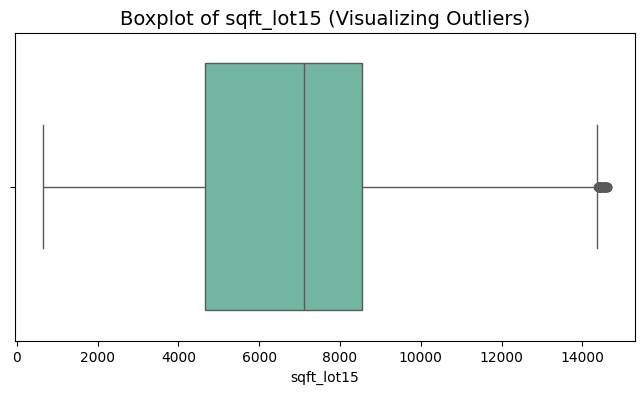

In [212]:
for col in df_cleaned.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_cleaned, x=col, palette="Set2")
    plt.title(f"Boxplot of {col} (Visualizing Outliers)", fontsize=14)
    plt.show()

In [213]:
def clip_outliers(df):
    df_copy = df.copy()
    for col in df_copy.select_dtypes(include='number').columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_copy[col] = df_copy[col].clip(lower, upper)
    return df_copy

df_clipped = clip_outliers(df)


/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


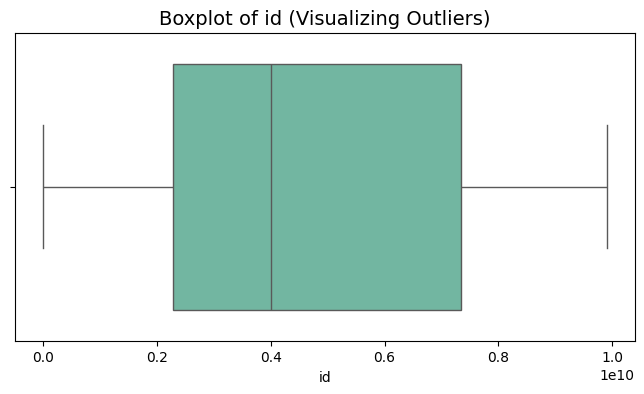

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


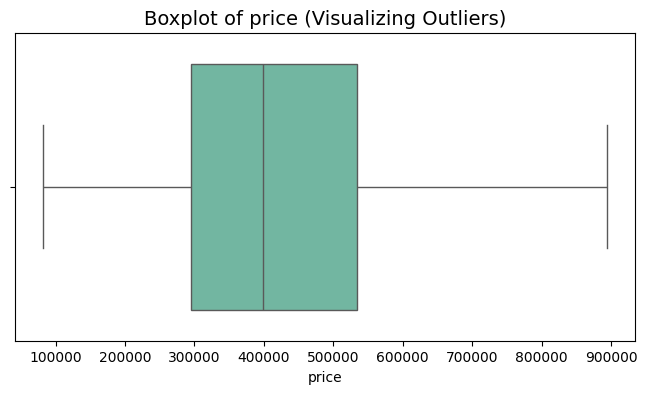

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


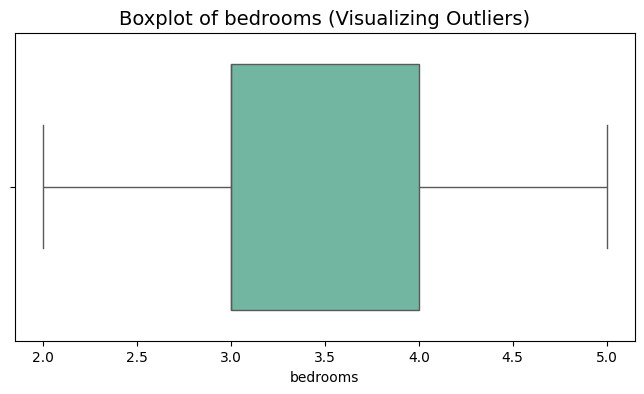

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


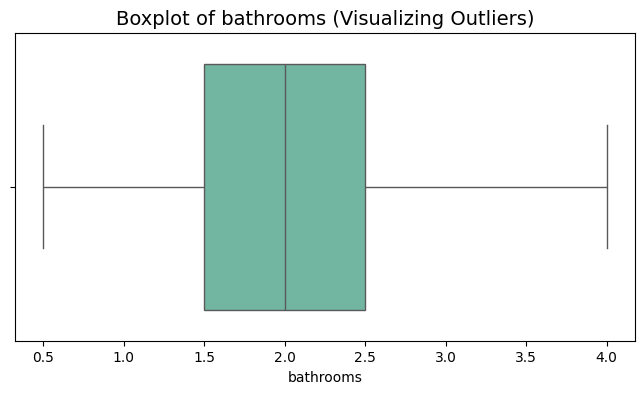

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


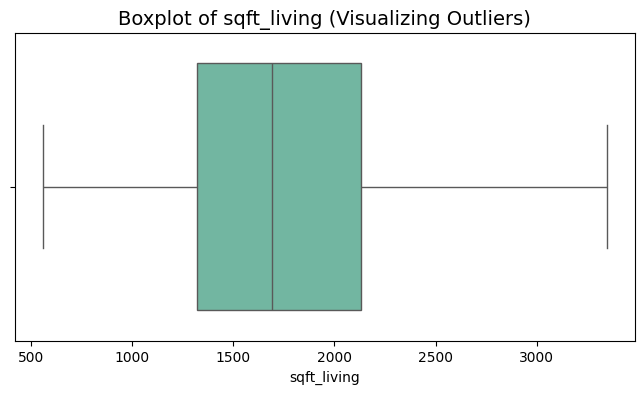

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


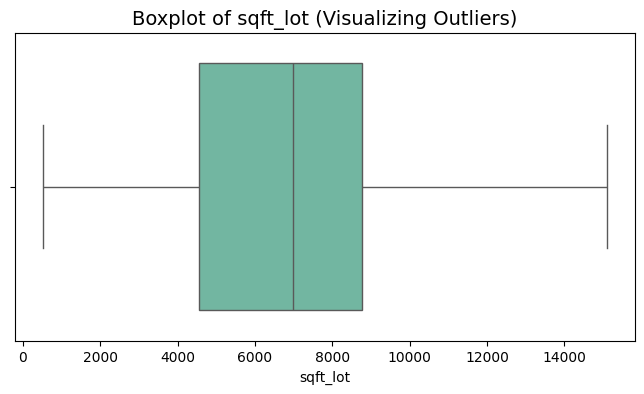

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


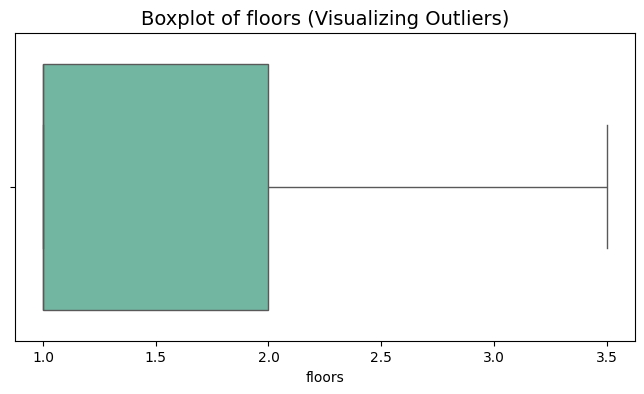

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


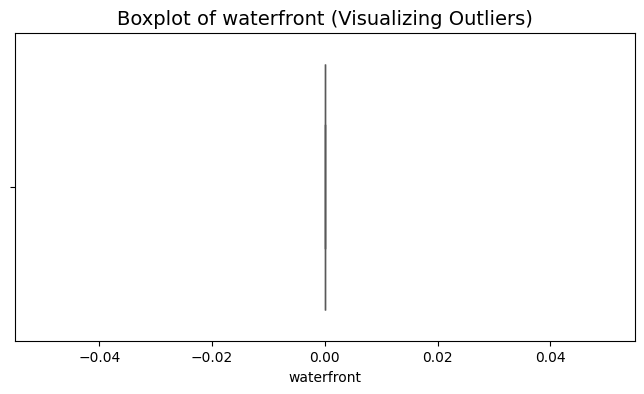

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


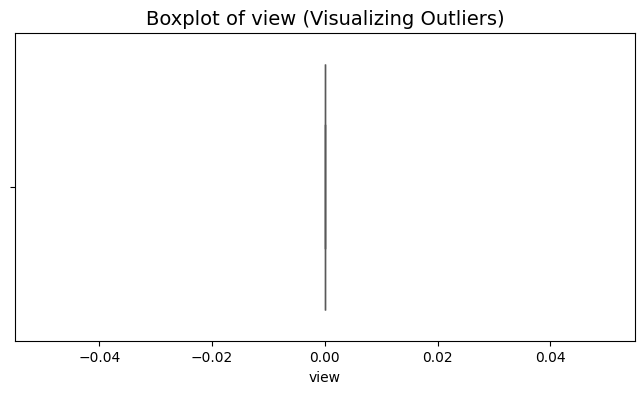

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


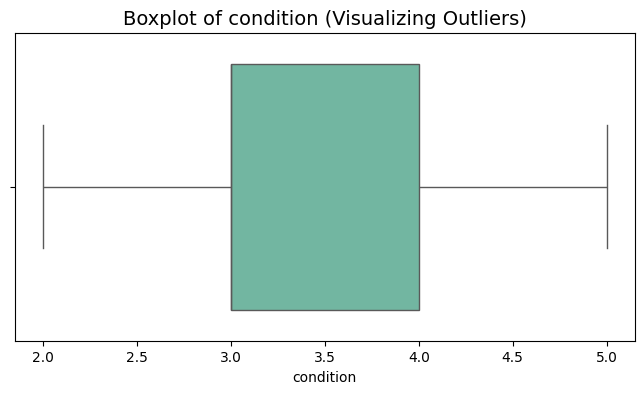

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


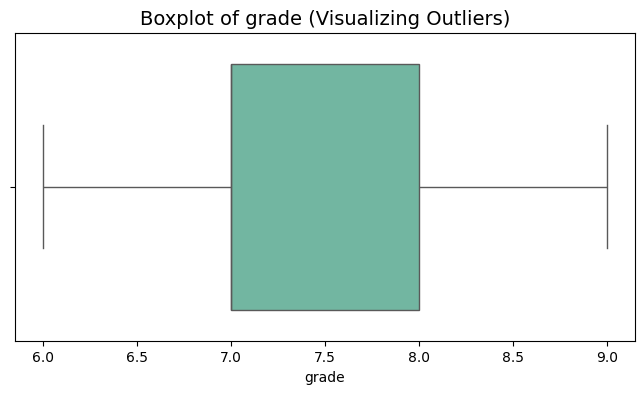

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


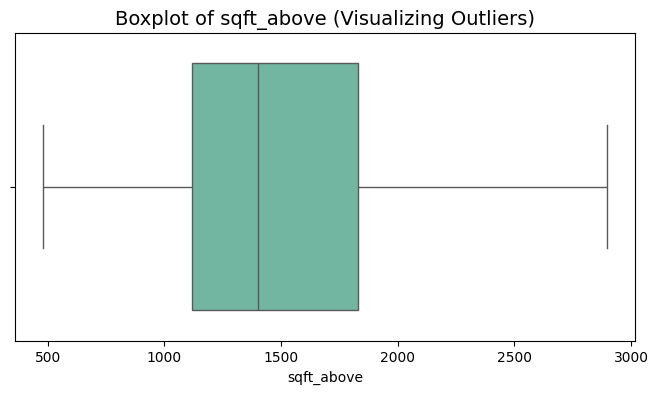

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


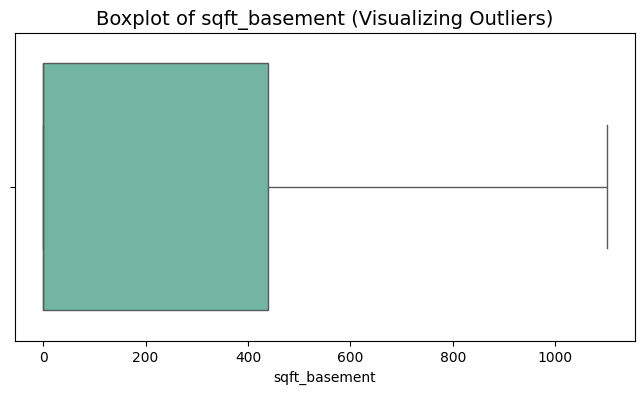

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


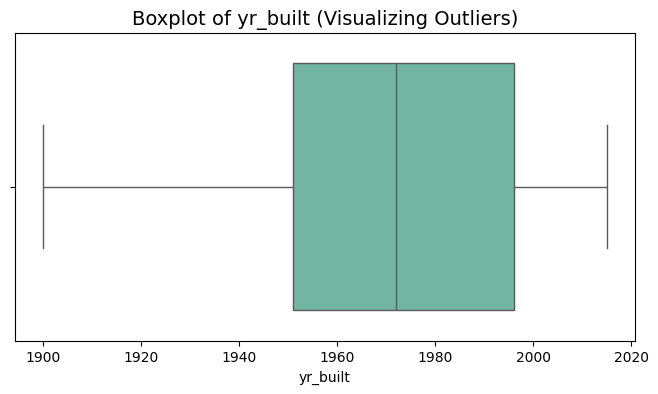

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


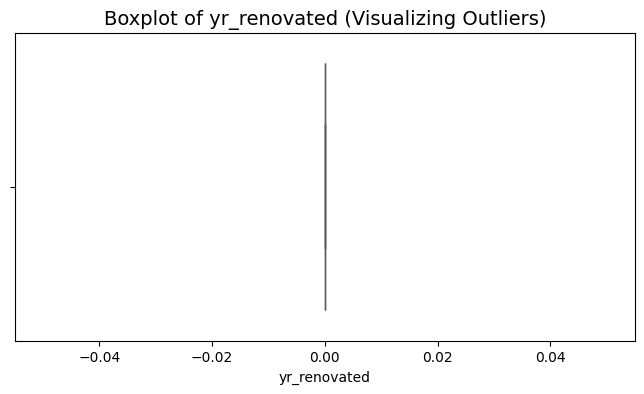

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


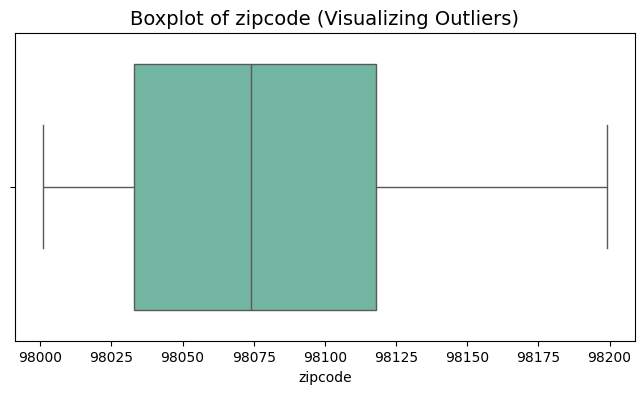

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


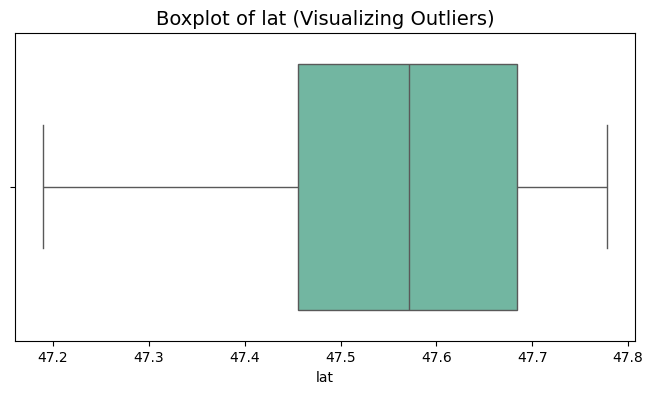

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


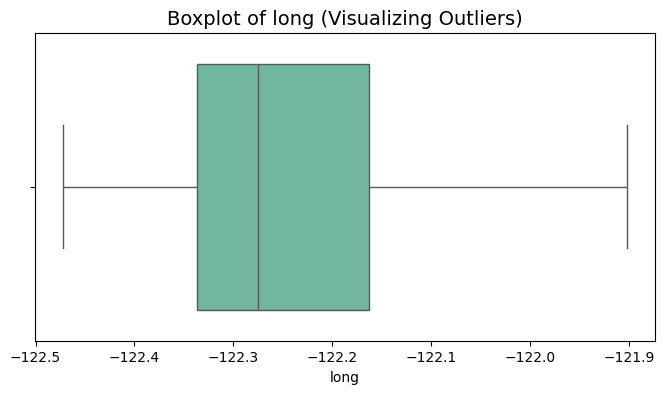

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


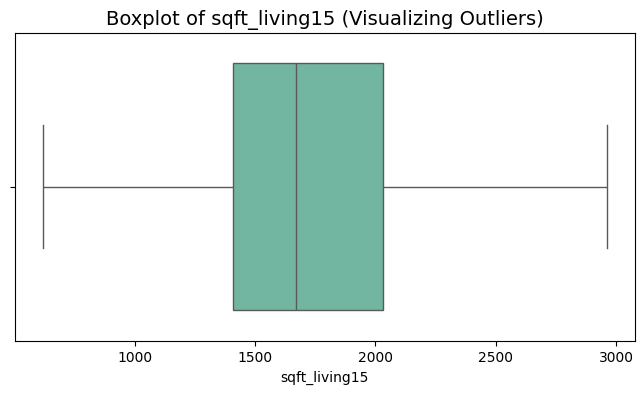

/tmp/ipython-input-3748746109.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clipped , x=col, palette="Set2")


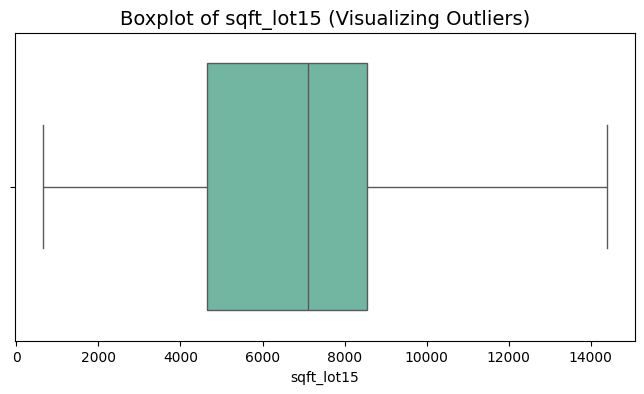

In [214]:
for col in df_clipped .select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_clipped , x=col, palette="Set2")
    plt.title(f"Boxplot of {col} (Visualizing Outliers)", fontsize=14)
    plt.show()

In [215]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [216]:
df_encoded = pd.get_dummies(df_clipped, drop_first=True)


In [217]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13868 entries, 0 to 21612
Columns: 386 entries, id to date_20150524T000000
dtypes: bool(366), float64(7), int64(13)
memory usage: 7.1 MB


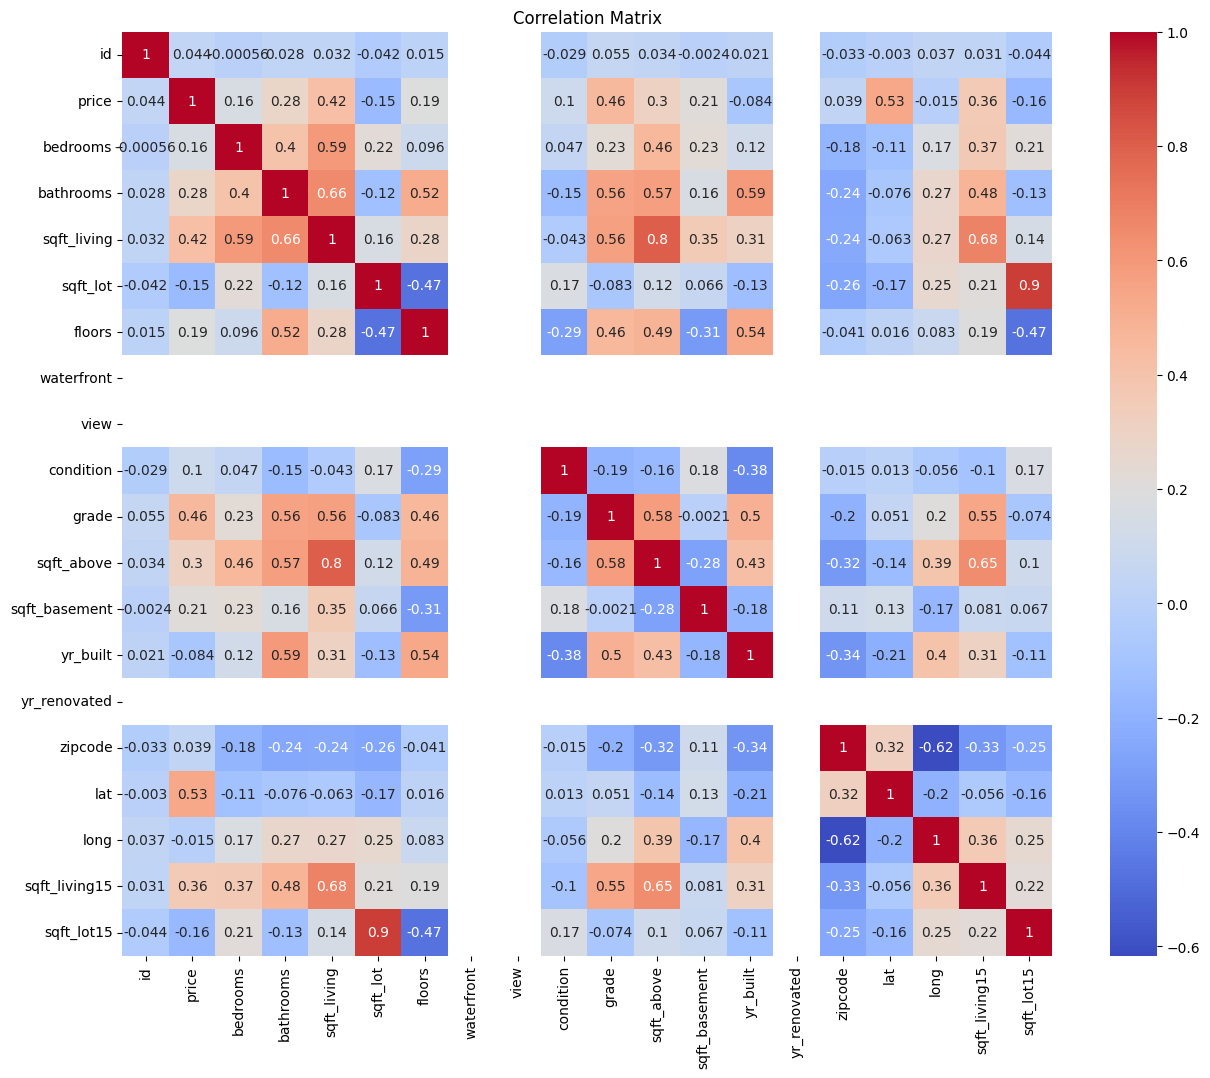

In [218]:
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [219]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [220]:
drop_col = ['waterfront', 'view', 'yr_renovated']
df_clipped = df_clipped.drop(columns=drop_col)


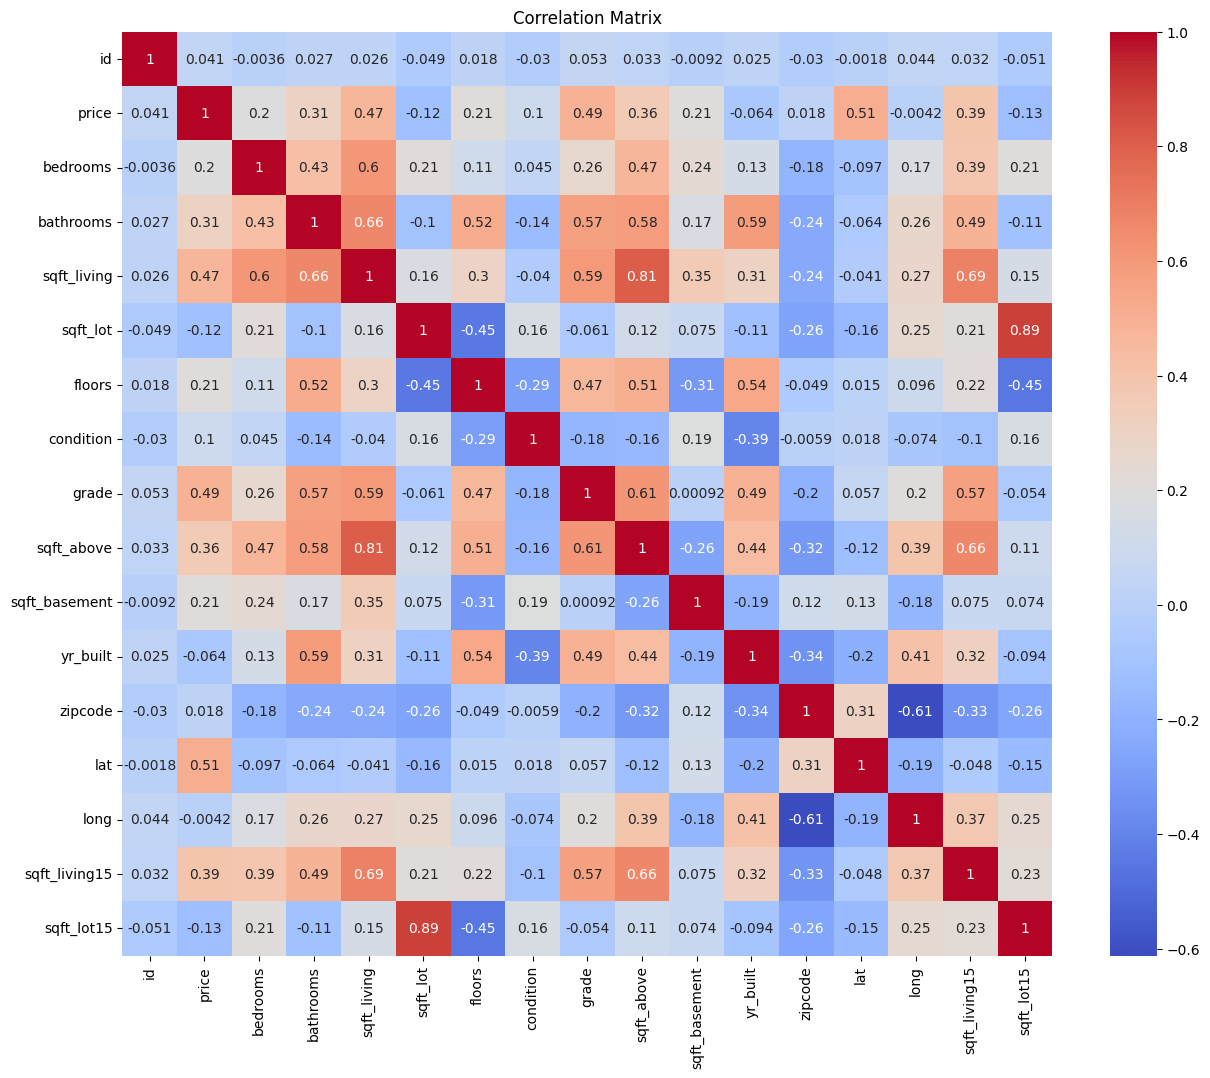

In [221]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_clipped.drop('date', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [222]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [223]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)


In [247]:
from sklearn.tree import DecisionTreeRegressor


In [248]:
model = DecisionTreeRegressor(random_state=42)

In [249]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [250]:
y_pred = model.predict(X_test)

In [251]:
from sklearn.metrics import mean_squared_error, r2_score

In [252]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 7472849211.046563
R² Score: 0.7423476080781659


In [255]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [256]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 8126016132.18234
R² Score: 0.7198274133302134


[Text(0.5, 0.9166666666666666, 'lat <= 47.533\nsquared_error = 28993226377.375\nsamples = 9707\nvalue = 427427.732'),
 Text(0.25, 0.75, 'sqft_living <= 1925.5\nsquared_error = 7790234040.925\nsamples = 3753\nvalue = 294779.31'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'sqft_living <= 1465.0\nsquared_error = 4254068243.166\nsamples = 2371\nvalue = 257914.755'),
 Text(0.0625, 0.4166666666666667, 'lat <= 47.508\nsquared_error = 3709116133.29\nsamples = 1241\nvalue = 234571.695'),
 Text(0.03125, 0.25, 'sqft_living <= 1245.0\nsquared_error = 2424446469.877\nsamples = 989\nvalue = 221997.43'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 2047828509.782\nsamples = 563\nvalue = 207555.234'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 2282224701.416\nsamples = 426\nvalue = 241084.181'),
 Text(0.09375, 0.25, 'long <= -122.378\nsquared_error = 5695083591.8\nsamples = 252\nvalue = 283920.694'),
 Text(0.078125, 0.08333333333333333, 'squared_e

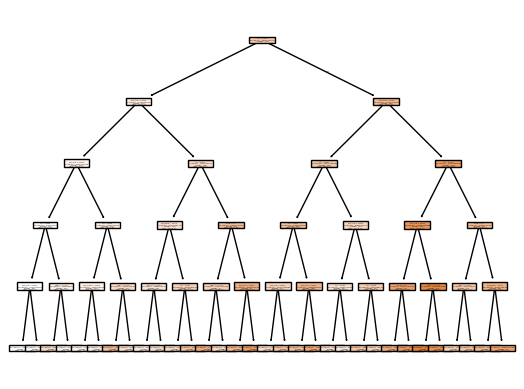

In [257]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names=X.columns, filled=True)


In [258]:
model = DecisionTreeRegressor(
    max_depth=10,              # Limit the depth of the tree
    min_samples_split=10,
    # Minimum number of samples required to split an internal node
    min_samples_leaf=5,
    # Minimum number of samples required to be at a leaf node
    random_state=42
)


In [259]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [260]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 5823880680.188178
R² Score: 0.7992015166986497


[Text(0.5228717833632556, 0.9545454545454546, 'lat <= 47.533\nsquared_error = 28993226377.375\nsamples = 9707\nvalue = 427427.732'),
 Text(0.27406867145421904, 0.8636363636363636, 'sqft_living <= 1925.5\nsquared_error = 7790234040.925\nsamples = 3753\nvalue = 294779.31'),
 Text(0.3984702274087373, 0.9090909090909092, 'True  '),
 Text(0.1550344105326152, 0.7727272727272727, 'sqft_living <= 1465.0\nsquared_error = 4254068243.166\nsamples = 2371\nvalue = 257914.755'),
 Text(0.08464242968282465, 0.6818181818181818, 'lat <= 47.508\nsquared_error = 3709116133.29\nsamples = 1241\nvalue = 234571.695'),
 Text(0.052588270496708556, 0.5909090909090909, 'sqft_living <= 1245.0\nsquared_error = 2424446469.877\nsamples = 989\nvalue = 221997.43'),
 Text(0.023189706762417713, 0.5, 'sqft_living <= 985.0\nsquared_error = 2047828509.782\nsamples = 563\nvalue = 207555.234'),
 Text(0.010771992818671455, 0.4090909090909091, 'sqft_living15 <= 1835.0\nsquared_error = 2604136416.814\nsamples = 191\nvalue = 1925

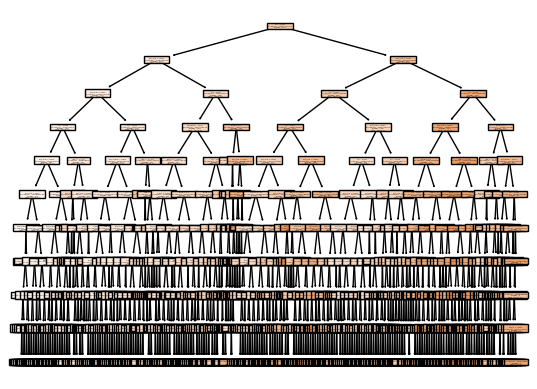

In [261]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names=X.columns, filled=True)


In [262]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)

grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print("best parameter", grid_search.best_params_)

best parameter {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [263]:
model = DecisionTreeRegressor(
    max_depth=10,              # Limit the depth of the tree
    min_samples_split=2,
    # Minimum number of samples required to split an internal node
    min_samples_leaf=5,
    # Minimum number of samples required to be at a leaf node
    random_state=42
)


In [264]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=42)

In [265]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 5823880680.188178
R² Score: 0.7992015166986497


In [242]:
from sklearn.ensemble import GradientBoostingRegressor

In [266]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,#num of tree
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [267]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          random_state=42)

In [268]:
y_pred = gb_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 4641120171.120399
R² Score: 0.8399812869878084
